# Homework 1: Numpy, Scipy, Pandas

### Due Friday Sept 9, 2016 @ 9am


## #1:  Super-resolution imaging 

Obtaining several snapshots of the same scene, from microscopes to telescopes, is useful for the postprocessing increase of signal to noise: by summing up imaging data we can effectively beat down the noise. Interestingly, if we image the same scene from different vistas we can also improve the clarity of the combined image. Being able to discern features in a scene from this combination effort is sometimes called super-resolution imaging.

Here, we'll combine about 4 seconds of a shaky video to reveal the statement on a license plate that is not discernable in any one frame.

<img src="../../Data/im2-1.png">

A tarball of the data is at: https://drive.google.com/open?id=0B4vIeCR-xYNnbXFJTTVlVnpUZkk

```bash
tar -xvzf homework1_data.tgz  # do NOT check this files into git...
```

**Problem 1** Read in each image into a `numpy` array. Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.fftconvolve` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places. 

   - Hint1: you'll need to figure out how to resize a numpy array
   - Hint2: you'll want to reverse the second image when doing the convolution: `scipy.signal.fftconvolve(im1, im2[::-1, ::-1])`
   - Hint3: you'll need to figure out how to identify the peak of the fft convolution to find the offsets between images

**Problem 2** Shift each image to register the frames to the original (expanded in size) frame. You should, in general, be shifting by subpixel offsets. You might want to look at `scipy.ndimage.interpolation.shift`

**Problem 3** Combine all the registered images to form a super-resolution image. What does the license plate read?

In [1]:
%pylab inline
import numpy as np
from scipy import misc, signal, ndimage
import matplotlib.pyplot as plt
from skimage.feature import register_translation as rt

Populating the interactive namespace from numpy and matplotlib


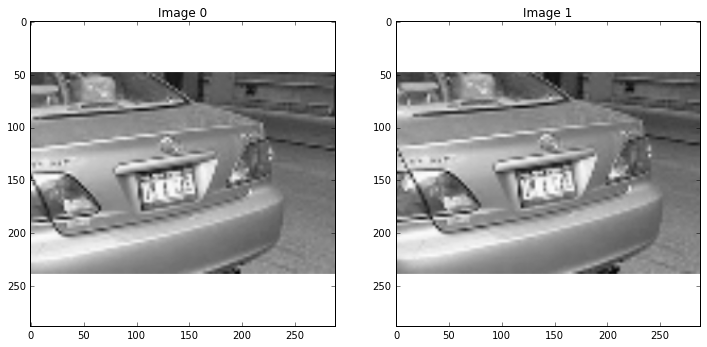

In [2]:
#Lets see how the images look like

img1 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-0.png")[:, :, 0]
img2 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-1.png")[:, :, 0]

plt.figure(figsize = (12, 6))
subplot(121)
plt.imshow(img1, cmap=plt.cm.gray)
plt.title("Image 0")
subplot(122)
plt.imshow(img2, cmap=plt.cm.gray)
plt.title("Image 1")
plt.show()


#### Use inbuilt functions to solve the problem for now

shift =  [  3. -13.]


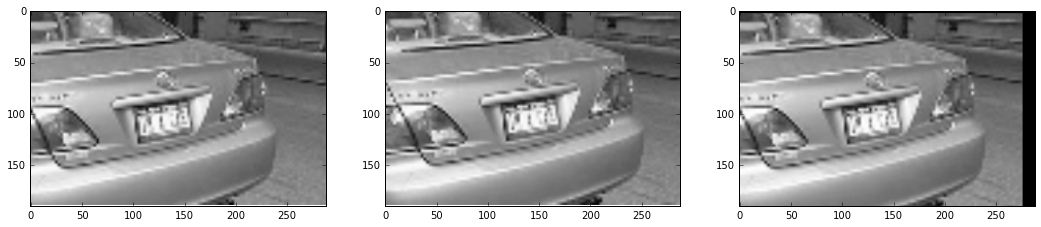

In [8]:
#Try for one image and see that it shifts things in the correct direction.
img1 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-0.png")[:, :, 0]
img2 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-1.png")[:, :, 0]

#IMPORTANT: Crop the white portion of every image since that will probably dominate the correlation

shift = rt(img1[50:240, :], img2[50:240, :], upsample_factor=1.)[0]
print("shift = ", shift)
img2_s = ndimage.interpolation.shift(img2[50:240, :], shift)

plt.figure(figsize = (18, 6))
subplot(131)
plt.imshow(img1[50:240, :], cmap=plt.cm.gray)
subplot(132)
plt.imshow(img2[50:240, :], cmap=plt.cm.gray)
subplot(133)
plt.imshow(img2_s, cmap=plt.cm.gray)
plt.show()

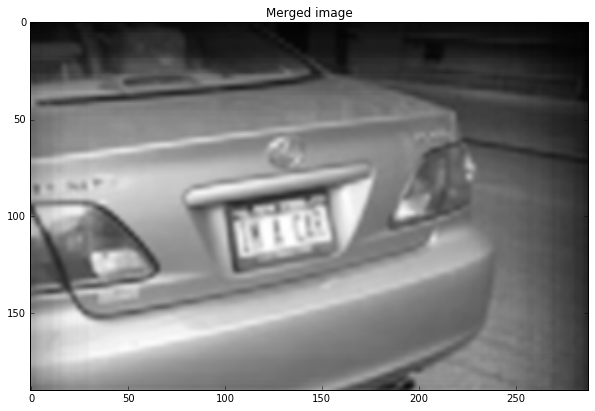

In [109]:
#Run a loop on all the images. 

img1 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-0.png", flatten=True)
img1 = img1[50:240, :]
imagef = img1.copy()
shiftlist = np.empty([100, 2])
for foo in range(100):
    img2 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-%d.png"%foo, flatten=True)
    img2 = img2[50:240, :]
    shift = rt(img1, img2, upsample_factor=20.)[0]
    shiftlist[foo, :] = shift
    img2_s = ndimage.interpolation.shift(img2, shift)
    imagef += img2_s

figure(figsize = (10, 8))
plt.imshow(imagef, cmap=plt.cm.gray)
plt.title("Merged image")
plt.show()

In [121]:
for foo in range(100):
    print("shift image %d by (%0.2f, %0.2f)"%(foo, shiftlist[foo, 0], shiftlist[foo, 1]))

shift image 0 by (0.00, 0.00)
shift image 1 by (2.60, -12.95)
shift image 2 by (40.60, -2.20)
shift image 3 by (59.15, 11.10)
shift image 4 by (0.00, 0.40)
shift image 5 by (2.45, 10.95)
shift image 6 by (44.50, 24.05)
shift image 7 by (0.00, -40.15)
shift image 8 by (21.70, -11.95)
shift image 9 by (-0.05, -26.75)
shift image 10 by (34.70, -2.55)
shift image 11 by (18.95, -55.45)
shift image 12 by (20.80, -7.75)
shift image 13 by (8.50, -34.85)
shift image 14 by (18.70, -2.50)
shift image 15 by (59.00, -6.25)
shift image 16 by (38.05, 11.05)
shift image 17 by (18.75, -24.10)
shift image 18 by (35.95, -32.00)
shift image 19 by (13.90, -7.90)
shift image 20 by (-15.95, -26.80)
shift image 21 by (26.40, -36.30)
shift image 22 by (15.95, -32.20)
shift image 23 by (5.15, -35.60)
shift image 24 by (37.75, -21.00)
shift image 25 by (40.45, -20.70)
shift image 26 by (0.05, -55.85)
shift image 27 by (15.35, 16.15)
shift image 28 by (17.40, 18.70)
shift image 29 by (45.85, -0.05)
shift image 30

#### The number plate reads IN A CAR

##### Lets try this problem without using inbuilt functions now. 

In [10]:
from scipy.optimize import curve_fit

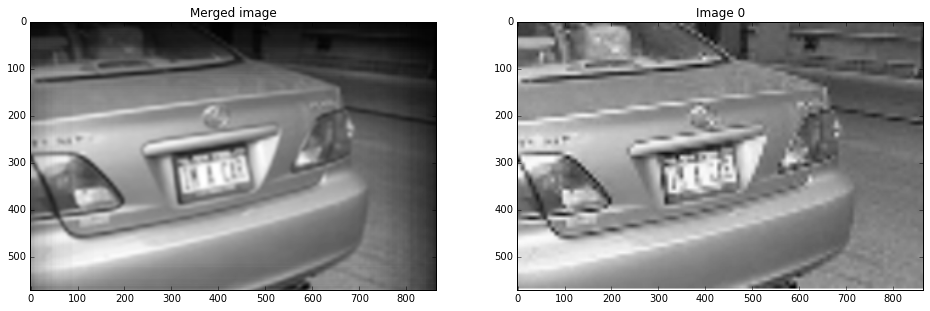

In [88]:
#I played with fftconvolve. It did not work. I don't really understand why
#Thus here, I do find the correlation in traditional manner instead of using inbuilt function- doing FFT
# and then multiplying in fourier space, and transforming back.

img1 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-0.png", flatten=True)[50:240, :]
img1 = misc.imresize(img1, np.array(img1.shape)*3)
img1fft = np.fft.rfftn(img1)
shape = np.array(img1.shape)
imagef = img1.copy().astype("float32")
shiftlist_m = []

for foo in range(100):
    img2 = misc.imread("/home/chirag/Programs/Python/AstroPy_Class/homework/Data/hw1_data/im2-%d.png"%foo, flatten = True)[50:240, :]
    img2 = misc.imresize(img2, np.array(img2.shape)*3)
    img2fft = np.fft.rfftn(img2)

    crossf = img1fft*img2fft.conj()
    cross = np.fft.irfftn(crossf)

    #This calculates shift in integers. We can interpolate using a parabolic function as mentioned on piazza to 
    # this upto decimal places.
    # However since that is straighforward, we use the shifts from above to answer problem 1

    shift = np.array(np.unravel_index(np.argmax(abs(cross)), cross.shape))
    shift[shift > shape/2.] -= shape[shift > shape/2.]
    shiftlist_m.append(shift)
    img2_s = ndimage.interpolation.shift(img2, shift)
    imagef += img2_s

figure(figsize = (16, 8))
plt.subplot(121)
plt.imshow(imagef, cmap=plt.cm.gray)
plt.title("Merged image")
plt.subplot(122)
plt.imshow(img1, cmap=plt.cm.gray)
plt.title("Image 0")
plt.show()

Yes, the number plate reads "IN A CAR"

#### _I have no idea why np.fftconvolve did not work as was mentioned in the hint. When I find the correlation in a naive manner, i.e. fftconvolving things, I find the shifts immediately Any explanation on this, or a solution showing that it works will be quite helpful._

# #2: An elementary introduction to spectral audio compression

In this problem, we'll explore the very basics of audio compression in the spectral domain using numpy and scipy. We'll do a bit of visualization with matplotlib, but since that is covered later in the course, we'll provide those functions for you.

Audio compression is a large and complex topic, and the design of a format for compressed audio such as the popular [MP3](http://en.wikipedia.org/wiki/MP3) is too complex to cover in detail here. However, we will introduce the basic tools that most such compression formats use, namely:

1. Converting the input signal to the frequency domain by taking a Fast Fourier Transform (FFT).

2. Dropping information in the frequency domain, resulting in a smaller amount of data.

3. Reconstructing back the signal in the time domain from this smaller representation of the signal.

Steps 1 and 2 above are the 'encoding' part of signal compression, and step 3 is the 'decoding' part. For this reason, the tools that perform these steps are typically referred to as signal 'codecs', short for encoders/decoders.

Note that here we say 'signal': while MP3 is an audio format, the same ideas apply to the compression of digital images with formats such as JPEG and video.  Virtually all multimedia technologies we use today, from audio players to cell phones, digital cameras and YouTubeVideo, are based on sophisticated extensions and applications of these simple ideas.

Let's first load the plotting tools and importing some tools we'll need later:

In [86]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from collections import OrderedDict

# we'll need some path manipulations later on
import os

Populating the interactive namespace from numpy and matplotlib


/home/chirag/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cross', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We define a simple utility function to listen to audio files right in the browser:

In [33]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))
    
    

We also define a convenience wrapper around `plt.specgram`, [matplotlib's spectrogram function](http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.specgram), with a colorbar and control over the color limits displayed. This will make it easier to compare across different signals with the same colors for all inputs.

In [27]:
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

**Problem 1**: Use the `Audio` function above to listen to the signal we will be experimenting with, a simple voice recording stored in the file `hw_0_data/voice.wav`.

Note: if your browser doesn't support audio, you may try a different browser.   We've tested current versions of Chrome and Firefox, and it works OK with both.

In [35]:
# your code here
Audio("voice.wav")

**Problem 2**: Write a function to compress a 1-d signal by dropping a fraction of its spectrum. 

You can drop the smallest components by setting their values to zero.

*Hints*: 

- look at the `np.fft` module, keeping in mind that your input signal is real.
- look at the `argsort` method of numpy arrays.

In [14]:
def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """
    # your code here
    xf = np.fft.rfft(x)
    order = np.argsort(abs(xf))
    dropbelow = int(fraction*len(xf))
    xf[order[:dropbelow]] = 0
    x_compressed = np.fft.irfft(xf)
    return x_compressed

As a quick visual check (not that this is *not* a formal test of correctness), experiment with a simple random signal by changing the compression ratio and plotting both the signal and the compressed version:

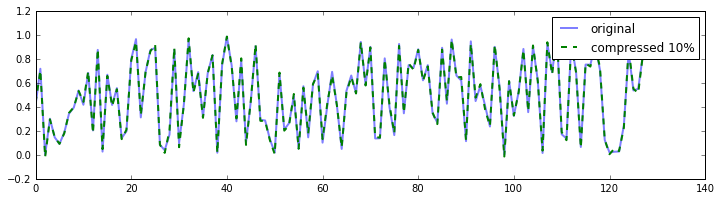

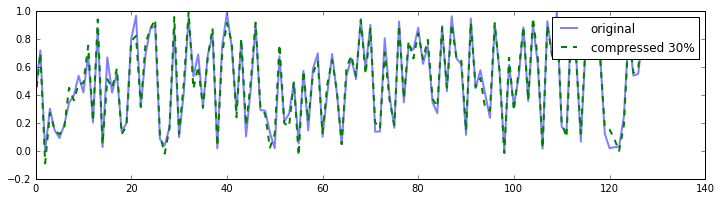

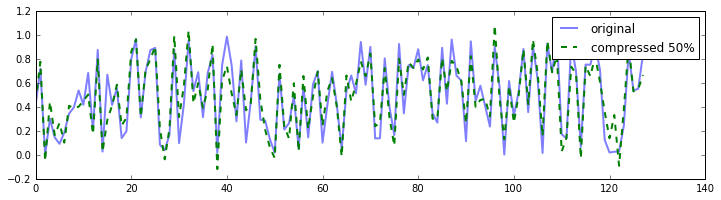

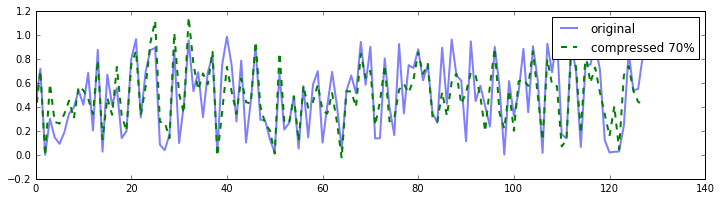

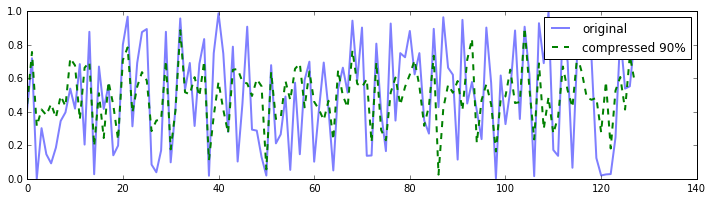

In [92]:
state = np.random.RandomState(1)
x = state.rand(128)
fraction = 0.9  # play changing this in the 0-1 range

for fraction in [0.1, 0.3, 0.5, 0.7, 0.9]:
    xa = compress_signal(x, fraction)

    plt.figure(figsize=(12,3))
    plt.plot(x, alpha=0.5, lw=2, label='original')
    plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction), ls = "--")
    plt.legend();

**Problem 3**: Write a function that will compress an audio file by a dropping a fraction of its spectrum, writing the output to a new file.

If the input file is named `a.wav` and the compression fraction is 0.9, the output file should be named `a_comp_0.9.wav`.

*Hints:* 

- look at the `scipy.io` module for routines dealing with files in `wav` format.

- you may need to use the `astype` method of numpy arrays to get the correct data type for `wav` files.

In [138]:
def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    
    # your code here
    rate, x = wavfile.read(fname)
    x_approx = compress_signal(x, fraction).astype(int16)
    
    counter = 0
    for foo in fname:
        if foo == ".":
            break
        counter += 1
    new_fname = fname[:counter]+"_comp_"+str(fraction)+fname[counter:]

#     wavfile.write(new_fname, rate, x_approx)
    return rate, x, x_approx, new_fname

**Problem 4**: Study the effect of compressing the input file at different ratios: 0.1, 0.5, 0.75, 0.9, 0.95, 0.99.

Using the `OrderedDict` class from the [Python collections module](http://docs.python.org/2/library/collections.html#collections.OrderedDict), store the uncompressed signal as well as the compressed array and filename for each compression ratio.

You will create an `OrderedDict` called `voices`, with:

- keys: compression ratios
- values: pairs of (x, filename) where x is the compressed audio and filename is the name of the compressed file.

In [136]:
# your code here
voices = OrderedDict()
for fraction in [0.1, 0.5, 0.75, 0.9, 0.95, 0.99]:
    rate, x, x_approx, new_fname = compress_wav("voice.wav", fraction)
    wavfile.write(new_fname, rate, x_approx)
    voices.update({str(fraction):(x_approx, new_fname)})

**Problem 5**: Loop over the `voices` dict, and for each one generate an audio player as well as a spectrogram.  Observe how the spectrogram changes, and listen to each file.  At what ratio do you stop understanding the recording?

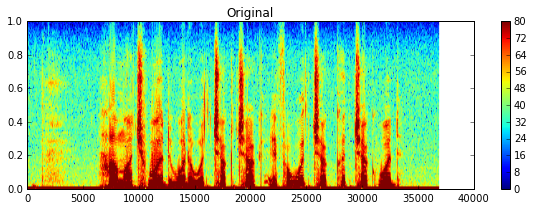

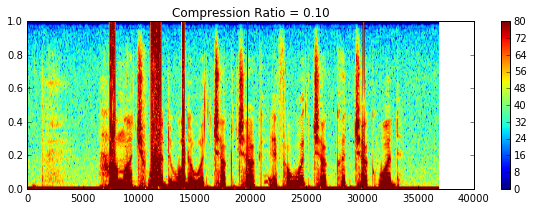

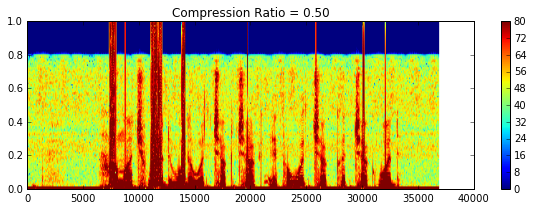

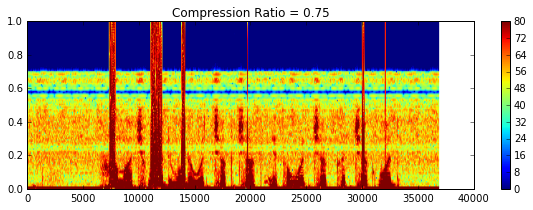

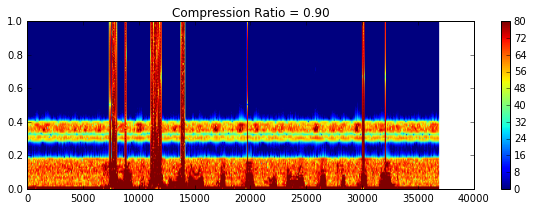

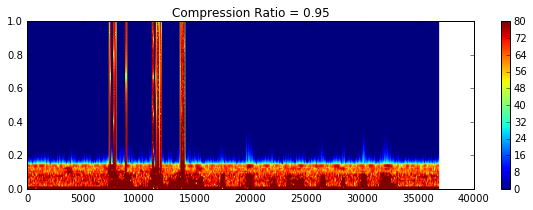

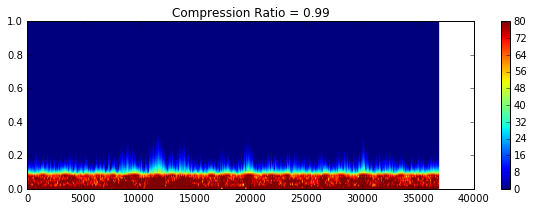

In [137]:
# your code here
rate, x = wavfile.read("voice.wav")
specgram_cbar(x, title="Original")
Audio("voice.wav")
for fraction in [0.1, 0.5, 0.75, 0.9, 0.95, 0.99]:
    specgram_cbar(voices[str(fraction)][0], title="Compression Ratio = %0.2f"%fraction)
    Audio(voices[str(fraction)][1])
    

## Conclusion
#### It seems we  can still faintly decipher what is being spoken for compression of 0.95 as well, if not distinctly (sounds like mumbling). <br> However you just hear a heavy bass-static for 0.99 compression with some variations when something is being spoken.  Its consistent with the spectrogram not having any peaks (red regions)

# #3: Armchair Astronomer

Often times, people act as good sensors of the physical universe. We can use Google Trends data to help us determine some fundamental parameters of the Solar System.

**Problem 1**: Using just the CSV file we created in the pandas lecture (`merged_data.csv`) and some frequency analysis tools in `scipy` to determine:

   - the number of days in a year
   - the period of the moon's orbit around the Earth
   
Hint: `from scipy.signal.spectral import lombscargle`

In [30]:
# your code here
import numpy as np
import pandas as pd
from scipy.signal import spectral
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt

df = pd.read_csv("../../Data/hw1_data/merged_data.csv", index_col=0, parse_dates=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2011-09-03 to 2016-08-27
Data columns (total 4 columns):
ice cream     261 non-null int64
Volleyball    261 non-null int64
tennis        261 non-null int64
full moon     261 non-null int64
dtypes: int64(4)
memory usage: 10.2 KB


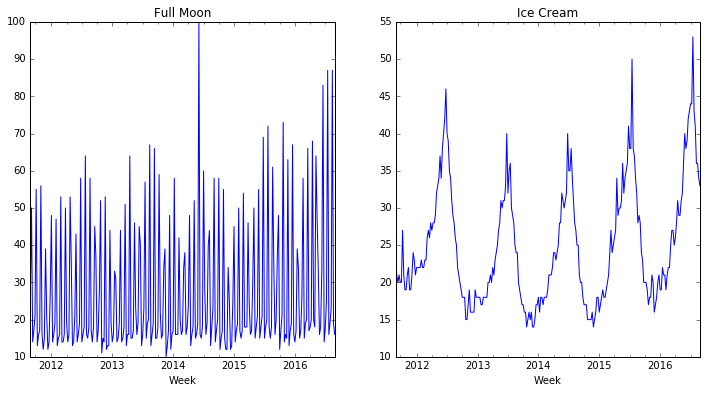

In [31]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
df["full moon"].plot()
plt.title("Full Moon")
plt.subplot(122)
df["ice cream"].plot()
plt.title("Ice Cream")
plt.show()

In [32]:
dtpattern = "%Y-%m-%d %H:%M:%S"

x = []
day0 = dt.strptime(str(df.index[0]), dtpattern)
for foo in range(df.index.size):
    diff = dt.strptime(str(df.index[foo]), dtpattern)- day0
    x.append(diff.days)

x = np.array(x)
x = x.astype("float64")

In [33]:
#To see if smoothing the time series improves the performance. 
#Played with it. Seemingly, it does not
def mov_av(ar, n):
    """Calculate moving average over n entries of array(ar)"""
    toret = np.empty_like(ar)
    for foo in range(n):
        toret[foo] = ar[:foo+1].mean()
    for foo in range(n, len(ar)):
        toret[foo] = ar[foo - n:foo].mean()
    return toret


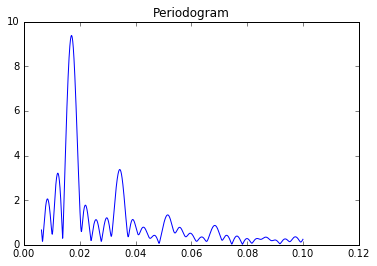

Length of a (ice-cream) year seems to be 368.667673 days


In [45]:
f = np.linspace(2*np.pi/1000, 0.1, 10000)
y = np.array(df["ice cream"])
y = y.astype("float64")
y -= y.mean()
pgram = spectral.lombscargle(x, mov_av(y, 5), f)

plt.plot(f, np.sqrt(4*pgram/x.size))
plt.title("Periodogram")
plt.show()
# plt.xlim(0.001, 0.1)
# print(f[np.argmax(pgram)])
T = 2*pi/f[np.argmax(pgram)]
print("Length of a (ice-cream) year seems to be %f days"%T)

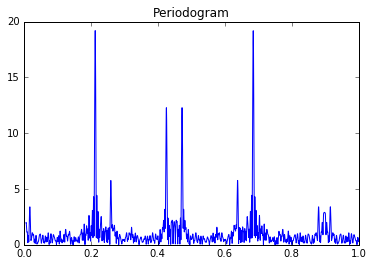

Time period of moon is calculated to be 29.526498 days


In [47]:
f = np.linspace(2*math.pi/1000., 1, 10000)
y = numpy.array(df["full moon"])
y = y.astype("float64")
y -= y.mean()
pgram = spectral.lombscargle(x, y, f)

plt.plot(f, np.sqrt(4*pgram/x.size))
plt.title("Periodogram")
plt.show()
# plt.axvline(1.5, color = "r")
# plt.xlim(0.8,1)
#print(f[np.argmax(pgram)])
T = 2*pi/f[np.argmax(pgram)]
print("Time period of moon is calculated to be %f days"%T)

# #4: Reproducing some insights about the Election

Nate ("not a genius, just a Bayesian") Silver writes often about polls and their utility of predicting elections. One of the things he emphasized during the 2016 campaign is that even "large" polls of people with a consistent lead for one candidate will show wild swings in any given window in time.

**Problem 1**: Using Pandas and `numpy`, try to reproduce this plot from a Nate Silve Tweet qualitatively using the same assumptions.

<img src="https://www.evernote.com/l/AUU-KkH3Z-lBdKokzCzVIUe53YZLQ9e_AuMB/image.png">

https://twitter.com/NateSilver538/status/769565612955824128

#### Note on my understanding of the problem

I am not sure what is meant by a 6 point lead. For the problem, I am taking it to mean that the difference in the probability of a person voting for Hillary than Trump is 6%, which translates to p(Hillary) = 0.53 and p(Trump) = 0.47.<br>
This qualitatively reproduces the above plot, but it seems with a different mean/offset.<br>
Of course, a simplification assumed in my understanding is that every voter is decided, which is not the case in reality. In elections, its generally reported that say X has ~31% support while Y has ~25% with the rest being undecided. This can be modelled by either discarding some votes with probability corresponding to undecided faction or counting those votes for either, with probability of 0.5. It will be interesting to see the results of these, and I will get back to them if I get time

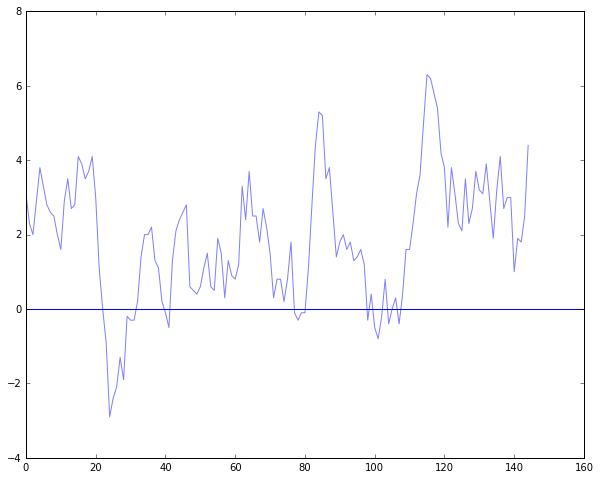

In [87]:
# your code here
# Merge pandas to keep tally of votes

def daypoll(npoll, plead):
    forlead = 0
    for foo in range(npoll):
        vote = np.random.uniform()
        if vote < plead:
            forlead += 1
    return forlead

lead = 0.06
plead = 0.5+lead/3.
nroll = 5
ndays = 150
npoll = 200
nsample = 1
result = np.empty([ndays])
rollav = numpy.empty([ndays - nroll, nsample])


for boo in range(nsample):
    result = np.empty([ndays])
    for foo in range(ndays):
        result[foo] = daypoll(npoll, plead)

    for foo in range(rollav.shape[0]):
        rollav[foo, boo] = (result[foo:foo+nroll].sum()/nroll/npoll -0.5)*100.

figure(figsize = (10, 8))
plt.plot(rollav, alpha = 0.5)
plt.axhline(0)
plt.show()

**Problem 2**: Clearly, even with a 6% point lead, there's a chance that this sort of poll would show the other person in the lead. How much would ahead (in percent) would a candidate need to be to have a tracking poll never show the other candidate to be ahead over the course of a year (in your simulation)?

In [88]:
# your code here
ndays = 365
nsample = 1000
plead = 0.5
check = 0
npoll = 200
rollav = numpy.empty([ndays - nroll])

for boo in range(nsample):
    broke = 0
    result = np.empty([ndays])
    for foo in range(ndays):
        result[foo] = daypoll(npoll, plead)

    for foo in range(rollav.shape[0]):
        check = (result[foo:foo+nroll].sum()/nroll/npoll -0.5)*100.
        if check < 0:
            print("%f lead is insufficient"%plead)
            plead += 0.01
            broke = 1
            boo = 0
            break
if broke == 0:
    print("%f lead is required"%plead)

0.500000 lead is insufficient
0.510000 lead is insufficient
0.520000 lead is insufficient
0.530000 lead is insufficient
0.540000 lead is insufficient
0.550000 lead is insufficient
0.560000 lead is insufficient
0.570000 lead is insufficient
0.580000 lead is required


#### Thus based on my understanding of point system, 16% point lead is required

**Problem 3**: With a 3 and 6% lead, how many people would need to be polled in 1 day to have the rolling 5-day poll result always show the leader ahead (over a year)?

In [93]:
# your code here
ndays = 365
nsample = 1000
lead = 0.06
check = 0
rollav = numpy.empty([ndays - nroll])

for lead in [0.06, 0.03]:
    npoll = 200
    plead = 0.5 + lead/2.
    for boo in range(nsample):
        broke = 0
        result = np.empty([ndays])
        for foo in range(ndays):
            result[foo] = daypoll(npoll, plead)

        for foo in range(rollav.shape[0]):
            check = (result[foo:foo+nroll].sum()/nroll/npoll -0.5)*100.
            if check < 0:
                print("For lead of %f, more people than %d per day are needed"%(lead, npoll))
                npoll += 100
                broke = 1
                boo = 0
                break
    if broke == 0:
        print("For lead of %f, atleast %d per day are needed in rolling average of 5 days"%(lead, npoll))


For lead of 0.060000, more people than 200 per day are needed
For lead of 0.060000, more people than 300 per day are needed
For lead of 0.060000, more people than 400 per day are needed
For lead of 0.060000, more people than 500 per day are needed
For lead of 0.060000, more people than 600 per day are needed
For lead of 0.060000, more people than 700 per day are needed
For lead of 0.060000, more people than 800 per day are needed
For lead of 0.060000, more people than 900 per day are needed
For lead of 0.060000, more people than 1000 per day are needed
For lead of 0.060000, atleast 1100 per day are needed in rolling average of 5 days
For lead of 0.030000, more people than 1100 per day are needed
For lead of 0.030000, more people than 1200 per day are needed
For lead of 0.030000, more people than 1300 per day are needed
For lead of 0.030000, more people than 1400 per day are needed
For lead of 0.030000, more people than 1500 per day are needed
For lead of 0.030000, more people than 1600

#### For a 6% point lead, you need 1100 people per day (5500 person tracking poll) and for 3% point lead, you need 4000 people per day (20000 person tracking poll)